In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time
import copy
import json

In [2]:

imageDictionary = {
    "image": [],
    "task1": [4, 5, 13, 14, 15],
    "grayImage": [],
    "faceDetectedImage": [],
    "realFaces": [],
    "realTarget": [],
    "targetDetection": []
}
cascadePath = "frontalface.xml"
cascade = cv.CascadeClassifier(cascadePath)

for i in range(16):
    image = cv.imread("./images/dart"+str(i)+".jpg")
    imageDictionary["image"].append(image)
    imageDictionary["grayImage"].append(cv.cvtColor(image, cv.COLOR_BGR2GRAY))


dummyImage = copy.deepcopy(imageDictionary["image"][5])

            




In [3]:
detectedFaceSquare = {
    
}
for i in range(len(imageDictionary["image"])):    
    face = copy.deepcopy(imageDictionary["grayImage"][i])
    faces = cascade.detectMultiScale(face, 1.1, 1, 0, (50,50), (300,300))
    detectedFaceSquare[str(i)] = []
    for (x,y,w,h) in faces:
        cv.rectangle(face,(x,y),(x+w,y+h),(255,0,0),2)
        detectedFaceSquare[str(i)].append([x, y, w])
    imageDictionary["faceDetectedImage"].append(face)


In [4]:
targetPath = "./dartcascade/cascade.xml"
targetCascade = cv.CascadeClassifier(targetPath)
detectedTarget = {
    
}

for i in range(len(imageDictionary["image"])):
    detectedTarget[str(i)] = []
    c = copy.deepcopy(imageDictionary["grayImage"][i])
    target = targetCascade.detectMultiScale(c, 1.1, 1, 0, (100,100), (250, 250))  
    for (x,y,w,h) in target:
        cv.rectangle(c,(x,y),(x+w,y+h),(0,0,255),2)
    imageDictionary["targetDetection"].append(c)
    detectedTarget[str(i)].append(target)



In [5]:
print(detectedTarget)

{'0': [array([[454, 113, 126, 126],
       [432,  23, 175, 175]], dtype=int32)], '1': [array([[219, 147, 150, 150]], dtype=int32)], '2': [array([[291,  87, 150, 150],
       [ 61,  47, 176, 176],
       [114, 187, 163, 163],
       [ 72,  94, 207, 207]], dtype=int32)], '3': [array([[305, 184, 111, 111],
       [181,   9, 136, 136],
       [313,  20, 101, 101],
       [304, 126, 106, 106],
       [270,   3, 116, 116],
       [ 48,   4, 153, 153]], dtype=int32)], '4': [array([[391, 328, 116, 116],
       [352,  96, 116, 116],
       [214, 110, 157, 157]], dtype=int32)], '5': [array([[542, 367, 108, 108],
       [163,  71, 104, 104],
       [645, 322, 123, 123],
       [561, 500, 162, 162],
       [387, 128, 146, 146],
       [368, 340, 174, 174]], dtype=int32)], '6': [array([[234, 142, 116, 116],
       [179,  11, 138, 138],
       [ 21,  97, 163, 163]], dtype=int32)], '7': [array([[339, 424, 106, 106],
       [360, 281, 144, 144],
       [ 11, 184, 217, 217]], dtype=int32)], '8': [array

In [6]:
def loadSquares():
    with open('squares.json', 'r') as f:
        a = json.load(f)
    return copy.deepcopy(a)

----------------------------------------
0


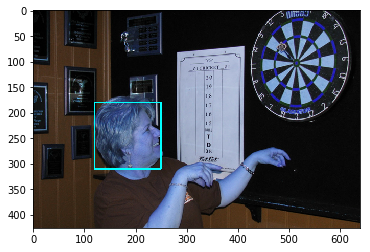

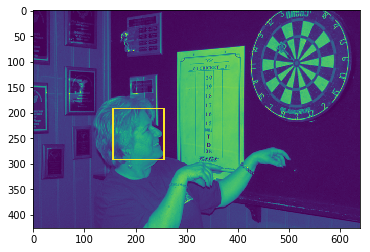

----------------------------------------
1


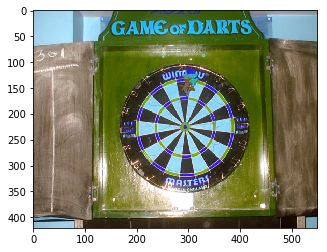

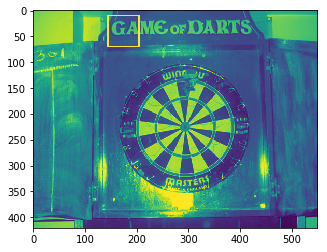

----------------------------------------
2


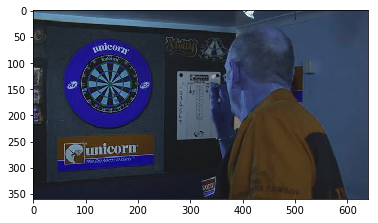

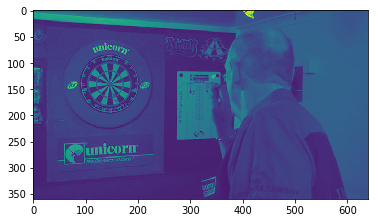

----------------------------------------
3


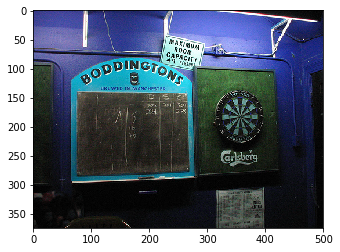

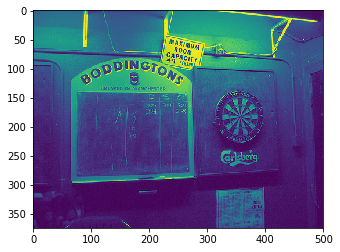

----------------------------------------
4


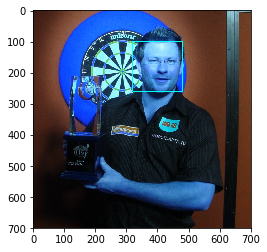

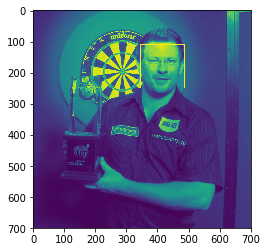

----------------------------------------
5


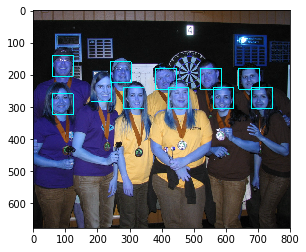

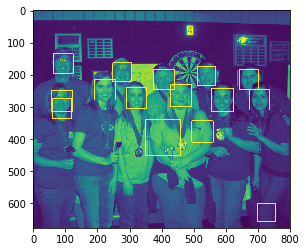

----------------------------------------
6


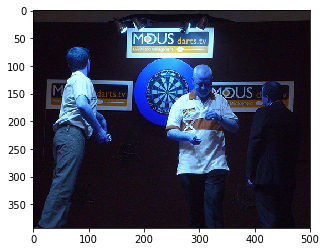

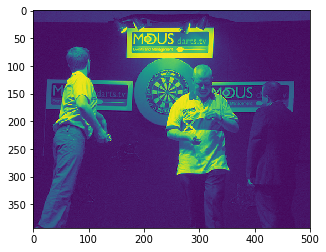

----------------------------------------
7


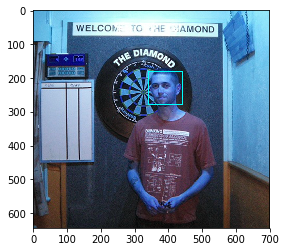

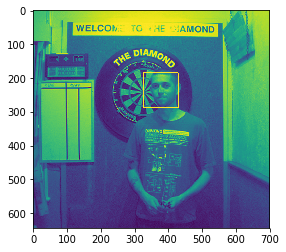

----------------------------------------
8


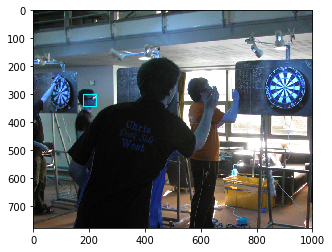

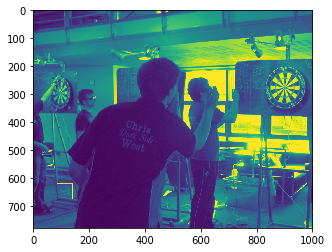

----------------------------------------
9


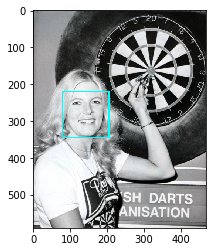

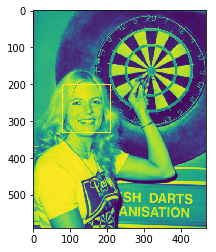

----------------------------------------
10


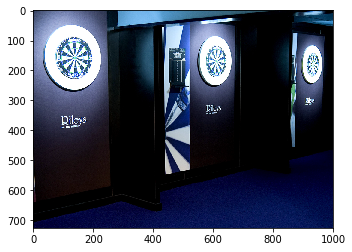

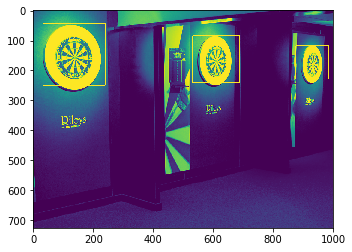

----------------------------------------
11


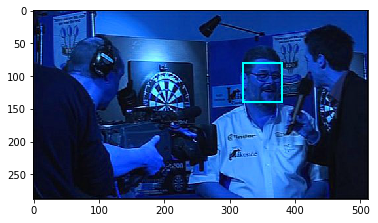

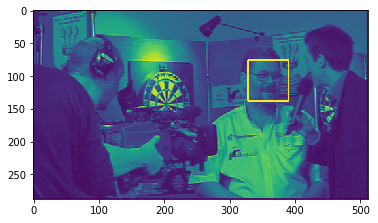

----------------------------------------
12


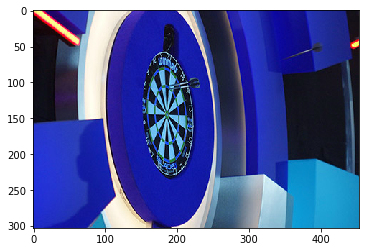

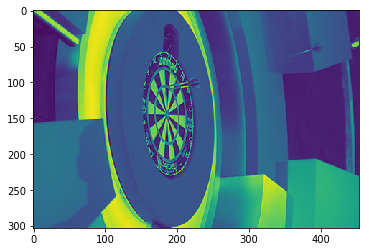

----------------------------------------
13


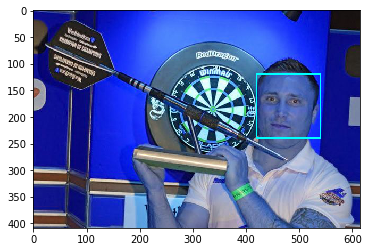

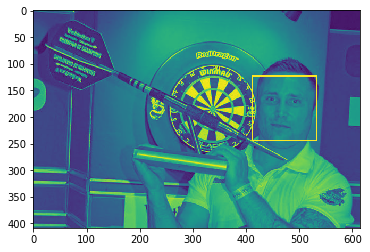

----------------------------------------
14


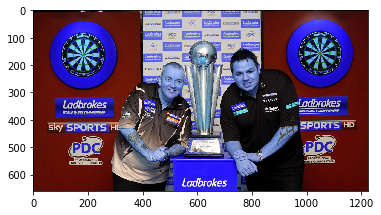

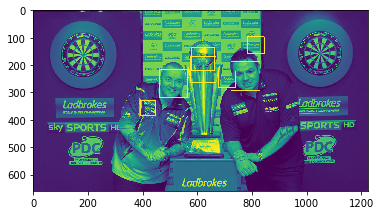

----------------------------------------
15


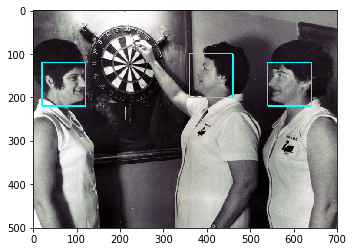

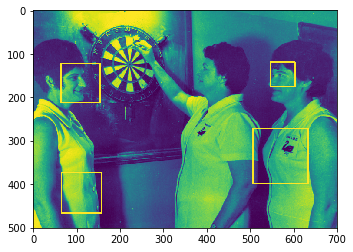

In [7]:
realFaceSquares = loadSquares()

for i in range(len(imageDictionary["image"])):
    c = copy.deepcopy(imageDictionary["image"][i])
    for x, y, a in realFaceSquares[str(i)]:
        cv.rectangle(c, (x, y), (x + a, y+a), (0, 255, 255), 2)
    imageDictionary["realFaces"].append(c)
    print("----------------------------------------")
    print(i)
    plt.imshow(c)
    plt.show()
    plt.imshow(imageDictionary["faceDetectedImage"][i])
    plt.show()
    

In [8]:
for i in range(len(realFaceSquares.keys())):
    numberOfFacesInImage = len(realFaceSquares[str(i)])
    facesDetected = len(detectedFaceSquare[str(i)])
    truePositives = 0
    falsePositives = 0
    for m in range(len(realFaceSquares[str(i)])):
        x, y, z = realFaceSquares[str(i)][m]
        for n in range(len(detectedFaceSquare[str(i)])):
            a, b, c = detectedFaceSquare[str(i)][n]
            if abs(a - x) < 50 and abs(b-y) < 50:
                truePositives += 1
                break
    falsePositives = facesDetected - truePositives
    print(i, numberOfFacesInImage, facesDetected, truePositives, falsePositives)
        
                
        

0 1 1 1 0
1 0 1 0 1
2 0 0 0 0
3 0 0 0 0
4 1 1 1 0
5 11 15 11 4
6 0 0 0 0
7 1 1 1 0
8 1 1 0 1
9 1 1 1 0
10 0 3 0 3
11 1 1 1 0
12 0 0 0 0
13 1 1 1 0
14 0 7 0 7
15 3 4 2 2


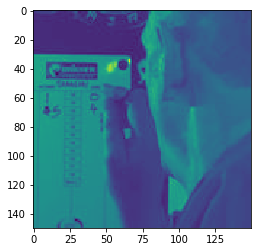

In [9]:
croppedTargets= {
    
}
    
for i in range(len(detectedTarget.keys())):
    croppedTargets[str(i)] = []
    for j in range(len(detectedTarget[str(i)])):
        x = detectedTarget[str(i)][j]
        for x, y, h, w in x:
            crop_img = imageDictionary["grayImage"][i][y:y+h, x:x+w]
            croppedTargets[str(i)].append(crop_img)

plt.imshow(croppedTargets["2"][0])
        

(176, 176)


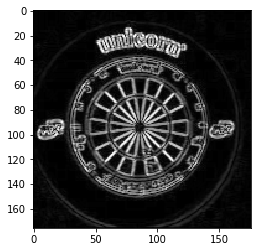

In [39]:
def magnitude(img):
    src = copy.deepcopy(img)
    src = cv.GaussianBlur( src, (3,3), 0, 0);
    sobelx = cv.Sobel(src,cv.CV_64F,1,0,ksize=3)  # x
    sobelx = cv.convertScaleAbs(sobelx)
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)  # y
    sobely = cv.convertScaleAbs(sobely)
    return cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

mag = magnitude(croppedTargets["2"][1])
# for x in range(len(mag)):
#     for y in range(len(mag[0])):
#         if mag[x][y] < 50:
#             mag[x][y] = 0
#         else:
#             mag[x][y] = 255
print(mag.shape)
plt.imshow(mag, cmap="gray")


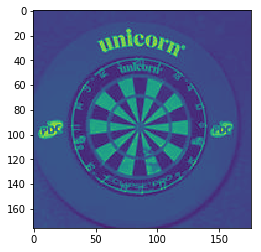

In [27]:
#circles = cv.HoughCircles(mag,cv.HOUGH_GRADIENT,1,20,
#                            param1=50,param2=50,minRadius=30,maxRadius=60)
#print(circles)
#circles = np.uint16(np.around(circles))
#lines = cv.HoughLinesP(mag,1,np.pi/180,100,0,40)
#print(len(lines))

#for i in range(len(lines)):
#    for x1,y1,x2,y2 in lines[i]:
#        cv.line(croppedTargets["2"][0],(x1,y1),(x2,y2),(0,255,0),2)

# for i in circles[0,:]:
#     # draw the outer circle
#     cv.circle(croppedTargets["1"][0],(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv.circle(croppedTargets["1"][0],(i[0],i[1]),2,(0,0,255),3)

plt.imshow(croppedTargets["2"][1])

In [13]:
def hough_line(image):    
    angles = np.deg2rad(np.arange(-90, 90))
    im_width, im_height = image.shape
    im_diag = int(np.round(np.sqrt(im_width**2 + im_height ** 2)))
    max_ps = np.linspace(-im_diag, im_diag, im_diag * 2)
        
    coses = np.cos(angles)
    sins = np.sin(angles)
    n_angles = len(angles)
    
    houghs = np.zeros((2 * im_diag, n_angles))
    
    
    for y in range(len(image)):
        for x in range(len(image[0])):
            if (image[y][x] == 255):
                for theta in range(n_angles):
                    p = int(np.round(x * coses[theta] + y * sins[theta])) + im_diag
                    houghs[p][theta] += 1
    
    return houghs, angles, max_ps

In [16]:
def get_threshold_line(houghs, threshold, jumpX, jumpY):
    
    over_threshold = []
    
    preYval = 0
    preXval = 0
    
    for y in range(len(houghs)):
        for x in range(len(houghs[0])):
            if houghs[y][x] > threshold:
                if preYval + jumpY < y or preXval + jumpX < x:
                    over_threshold.append((y, x))
                    preYval = y
                    preXval = x

    return np.array(over_threshold)

In [42]:
accumulator, angles, max_ps = hough_line(mag)
print(len(accumulator))
thresholded = get_threshold_line(accumulator, 2, 1, 1)
print(len(thresholded))

498
38
